## Saving and loading your data.

You want to save and load your data so that you do not need to recompute your light curve every time you want to change a plot. You are already sort of doing this when you have a jupyter cell where you are manipulating something stored in memory.

Let's generate fake data for an exoplanet transit

In [1]:
import numpy as np
from astropy.table import Table

data = np.hstack([np.random.random(size=30)/3 + 1, np.random.random(size=40)/3, np.random.random(size=30)/3 + 1])
error = 1/10 + np.random.random(size=100)/10

data_table = Table({'mag': data, 'mag_error': error, 'time': np.arange(100)})
print(data_table)

       mag              mag_error      time
------------------ ------------------- ----
1.1397054288489696  0.1464060740073288    0
1.0248185285486922 0.15011025512474463    1
1.1658846084424748 0.10388418465044733    2
1.1895716346027243 0.15442311214308058    3
1.2899040108099074 0.10701748919872868    4
1.2406291322558602 0.14340476104606997    5
1.0854557823208293 0.10934876036336053    6
1.2656295308791246 0.18605250160831643    7
1.1034942271033934 0.14394561858032234    8
1.1959686082257794 0.16925592687274582    9
               ...                 ...  ...
1.1072714933473953  0.1459645467741603   89
 1.009464515929002   0.195821754710794   90
1.1845905168423823 0.14862040448340452   91
1.0008888760967742 0.12411535115026928   92
1.2320559371106596  0.1260763944427908   93
1.2989457575042351  0.1337123759044106   94
 1.132715764542834 0.19196831819208784   95
1.2923382826234906  0.1897816778734882   96
1.2334014995328033 0.12762857321263232   97
 1.213950036805541 0.16336537290

### From your light curve analysis, you have data like this: an astropy.table.Table() object. We can write this out easily with Table.write()

In [2]:
from pathlib import Path
import os

home = str(Path.home())
filepath = os.path.join(home, 'Downloads/light_curve.csv')
data_table.write(filepath, overwrite=True)

So lets say that was the last line of your analysis. Now you can just load in the data table.

In [3]:
data_table = Table.read(filepath)
print(data_table)

       mag              mag_error      time
------------------ ------------------- ----
1.1397054288489696  0.1464060740073288    0
1.0248185285486922 0.15011025512474463    1
1.1658846084424748 0.10388418465044733    2
1.1895716346027243 0.15442311214308058    3
1.2899040108099074 0.10701748919872868    4
1.2406291322558602 0.14340476104606997    5
1.0854557823208293 0.10934876036336053    6
1.2656295308791246 0.18605250160831643    7
1.1034942271033934 0.14394561858032234    8
1.1959686082257794 0.16925592687274582    9
               ...                 ...  ...
1.1072714933473953  0.1459645467741603   89
 1.009464515929002   0.195821754710794   90
1.1845905168423823 0.14862040448340452   91
1.0008888760967742 0.12411535115026928   92
1.2320559371106596  0.1260763944427908   93
1.2989457575042351  0.1337123759044106   94
 1.132715764542834 0.19196831819208784   95
1.2923382826234906  0.1897816778734882   96
1.2334014995328033 0.12762857321263232   97
 1.213950036805541 0.16336537290

## And voila! We have our exoplanet transit. Saving and loading is also useful if you want to try out different photometry routines that get you to slightly different data sets. Like using 2 or 3 comparison stars. You can then make multiple plots and see which one yields better results.

## Part 2: Making nice plots

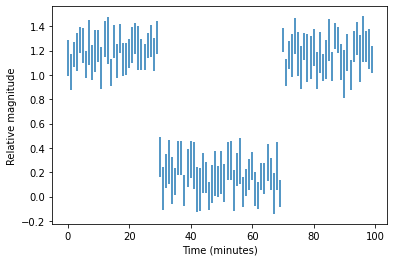

In [4]:
import matplotlib.pyplot as plt

# ls='none' disables the connection of the error bar points. Connecting the points is not standard in astronomy.

plt.figure()
plt.errorbar(data_table['time'], data_table['mag'], yerr=data_table['mag_error'], ls='none')
plt.xlabel('Time (minutes)')
plt.ylabel('Relative magnitude')
plt.show()

### improvements 1: adding scatter points and changing color

Rule of thumb for figures: you want details to be bold and have high contrast. Things should be easily visible and text should be easily readable. You don't want anyone squinting!

Also note that scientific figures do not have titles. You explain the figure in the caption and reference it in the text.

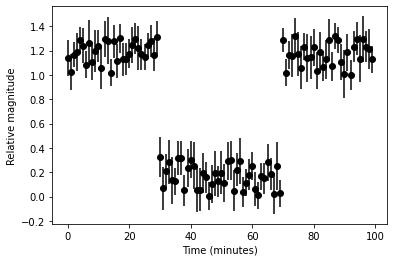

In [5]:
plt.figure()


plt.errorbar(data_table['time'], data_table['mag'], yerr=data_table['mag_error'], ls='none', color='k')


plt.scatter(data_table['time'], data_table['mag'], marker='o', color='k')
plt.xlabel('Time (minutes)')
plt.ylabel('Relative magnitude')
plt.show()

### Many improvements at once: the matplotlib style file

In [6]:
plt.style.use('sra_style.mplstyle') 
# and that is it! Now lets make our same plot...

# the style file comes from the MESA stellar evolution group at UCSB. Many thanks to Lars Bildsten, Bill Paxton, and Sunny Wong for sending me the file.

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern Roman


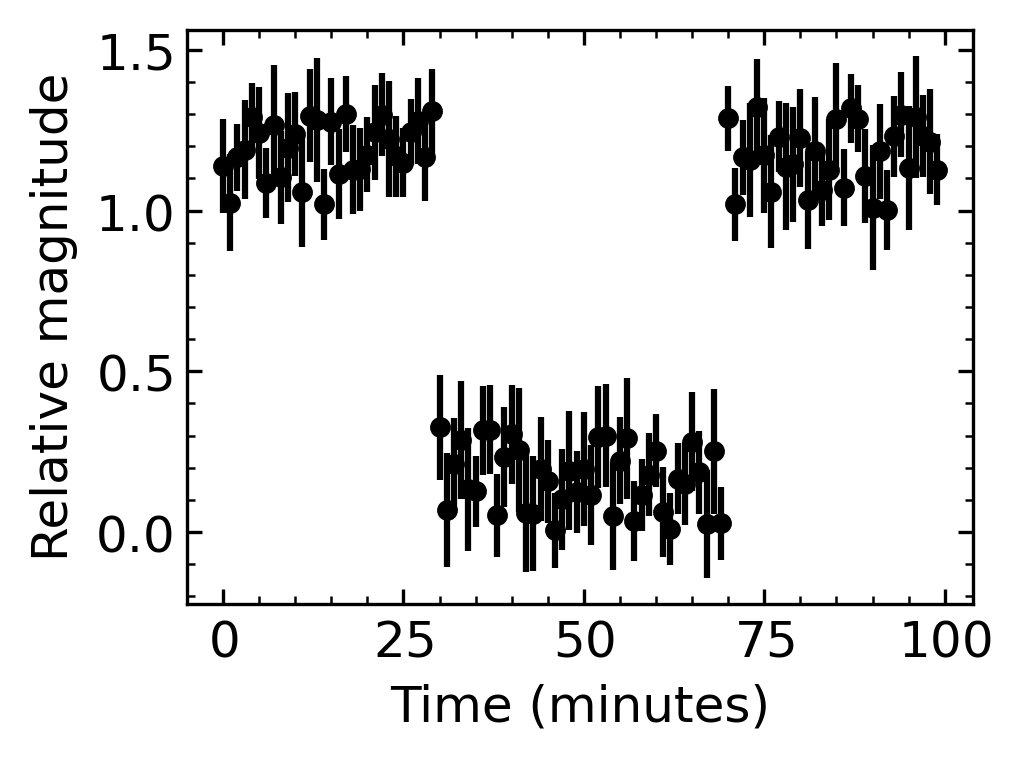

In [7]:
plt.figure()
plt.errorbar(data_table['time'], data_table['mag'], yerr=data_table['mag_error'], ls='none', color='k')
plt.scatter(data_table['time'], data_table['mag'], marker='o', color='k')
plt.xlabel('Time (minutes)')
plt.ylabel('Relative magnitude')
plt.show()

## OK that looks better, but the font could be a lot prettier than the python standard DejaVu Sans. 

### Note that this might only work if you have latex installed on your computer. For mac: https://tex.stackexchange.com/questions/470265/best-as-of-2019-way-to-install-latex

If on mac, try running in the command line: 

brew cask install basictex

If on windows: 

https://miktex.org/



In [19]:
# setting fonts once that is done:

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

You can typically use any font. Just replace Computer Modern with the font you want. Make it something serious and that looks good. You'll want to (ideally) match the font used in your paper. Or change your paper's font to Computer Modern.

Note that you can also use latex fonts automatically with the style file. Edit the following line in the sra_style.mplstyle, setting it to True:

text.usetex		: False

to

text.usetex		: True

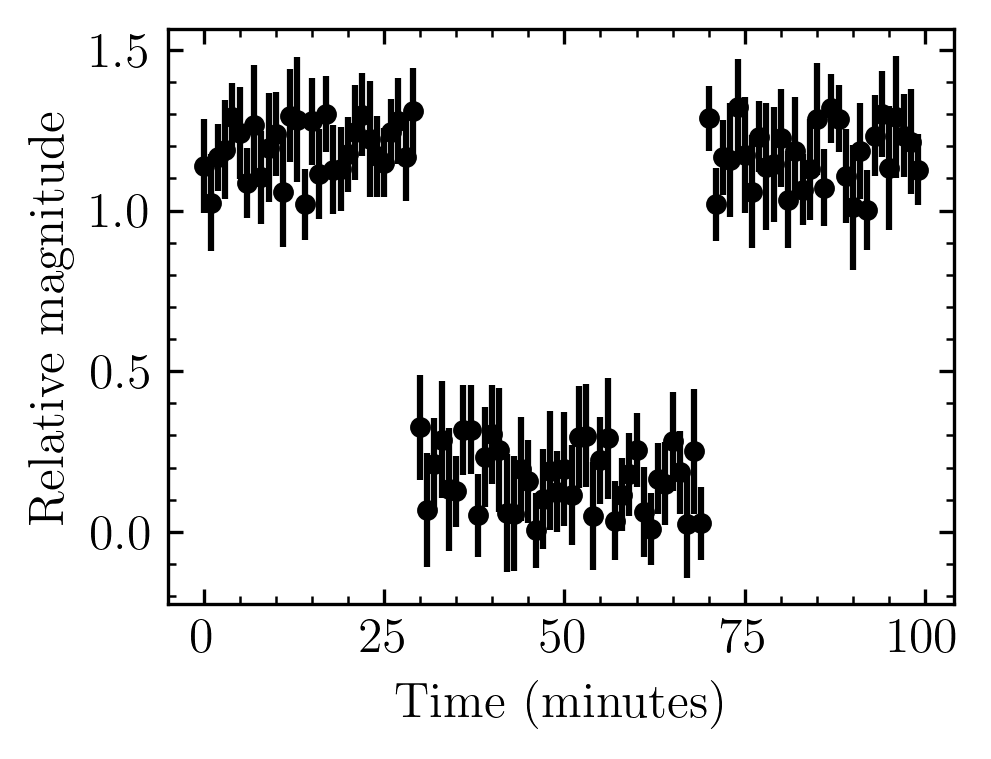

In [20]:
plt.figure()
plt.errorbar(data_table['time'], data_table['mag'], yerr=data_table['mag_error'], ls='none', color='k')
plt.scatter(data_table['time'], data_table['mag'], marker='o', color='k')
plt.xlabel('Time (minutes)')
plt.ylabel('Relative magnitude')
plt.show()

### Some additional improvements like transparency, adding an overplot of the transit model, and labelling:


alpha sets the transparency.  http://www.learningaboutelectronics.com/Articles/How-to-change-the-transparency-of-a-graph-plot-in-matplotlib-with-Python.php



In [10]:
# just me making a transit model to fit:

from pytransit import RoadRunnerModel
from astropy import units as u
from astropy import constants
# adapted from https://github.com/hpparvi/PyTransit/blob/master/notebooks/roadrunner/roadrunner_model_example_1.ipynb
times = np.linspace(-2, 2, 100)/24
tm = RoadRunnerModel('nonlinear')
tm.set_data(times)


# Thing for you to tweak!!!
radius_of_planet = 0.97* constants.R_jup
eccentricity = 0
###

radius_of_star = 10*constants.R_jup
radius_ratio = (radius_of_planet/radius_of_star).decompose()
flux_versus_time = tm.evaluate(k=radius_ratio, ldc=[0.36, 0.04, 0.1, 0.05], t0=0.0, p=1.0, a=4.3, 
                               i=0.5*np.pi, e=eccentricity, w=0.0)

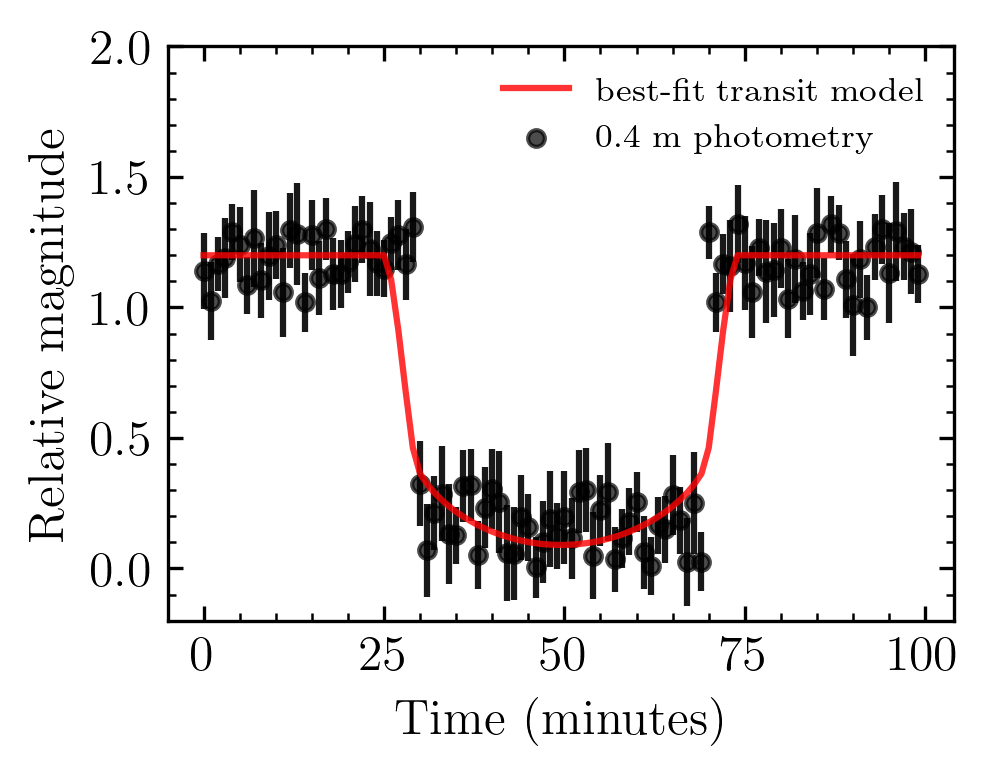

In [11]:
plt.figure()
plt.errorbar(data_table['time'], data_table['mag'], yerr=data_table['mag_error'], ls='none', 
             color='k', alpha=0.9)
plt.scatter(data_table['time'], data_table['mag'], marker='o', color='k', alpha=0.7,
           label='0.4 m photometry')
plt.plot(flux_versus_time*100 - 98.8, color='red', alpha=0.8, label='best-fit transit model')
plt.xlabel('Time (minutes)')
plt.ylabel('Relative magnitude')
plt.ylim(-0.2, 2)
plt.legend(loc='best') # display the legend
plt.show()

# rule of thumb: if you only have one set of data on the screen, you don't need to label. You describe in the caption.
# If you have more than 1, you need to label.

## And there you have it.. a publication quality plot in no time. 

#### Using matplotlib style files make it easy for you and your collaborators to make the same style plots. Having the same style plots within one paper is important.